# Stones squares

* Two players
* Can take only perfect squares of stones
* Who takes the last, wins
* Can player 1 win?

In [105]:
# A dynamic programming solution. Worked on all test cases, but timed out for values >10000.

class Solution1:
    def winnerSquareGame(self, n: int) -> bool:
        i = 1
        squares = []
        while True:
            sq = i*i
            if sq>n: break
            squares.append(sq)
            i += 1
                
        # We always report it in alice's perspective, not current player's
        mem = [{sq: True for sq in squares},{sq: False for sq in squares}] # For Bob and Alice
        return self.check_win(squares, n, True, mem)
    
    def check_win(self, squares, n, isAlice, mem):
        if n in mem[0 if isAlice else 1]:
            return mem[0 if isAlice else 1][n]
        maxi = 0
        while True:
            if maxi==len(squares): break
            if squares[maxi]>n: break            
            maxi += 1
        if isAlice:
            #print(f'Alice {n}:', [(squares[i],self.check_win(squares, n-squares[i], False)) for i in range(maxi)])
            ans = any([self.check_win(squares, n-squares[i], False, mem) for i in range(maxi)])
        else:
            ans =  all([self.check_win(squares, n-squares[i], True , mem) for i in range(maxi)])
        mem[0 if isAlice else 1][n] = ans
        return ans
    
s = Solution1()
for n in range(1,1000):
    #print(n, s.winnerSquareGame(n))
    if s.winnerSquareGame(n):
        print('!', end='')
    else:
        print('.', end='')

!.!!.!.!!.!.!!.!.!!.!.!!!!!!!!!!!.!!!!.!!!!.!!!!!!!.!!!!.!!!!.!!.!.!!!!.!!!!!!!!!!!!.!!!!!!!!!.!!!!!!!!!!!!!.!!!!!!!!!.!!!!.!!.!!.!.!!!!.!!!!.!!!!.!!.!!!!!!!!!!!!!!!!!!!.!!!!!!.!!.!.!!!!.!!!!.!!!!.!!!!!!.!!!!!.!!!!.!!!!!!!!!!!!!!!!!!!!!!.!!!!.!!!!!.!!!!!.!.!!.!.!!!!.!!!!.!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!.!!!!.!!!!.!!!!.!!.!!!!.!!!!.!!!!.!!!!!!!!!!!!!!!!!!.!!!!!!!.!!!!!!!!!!!!.!.!!!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!.!!!!!!.!!!!.!!!!.!.!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!.!!.!.!!.!.!!.!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!.!!!!!.!!!!.!!!!!!!!!!!!.!!!!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!!!!!!!.!.!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!!!!!!.!.!!.!!!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!.!!!!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!!!!!!!.!!!!.!!!!.!.!!.!.!!!!.!!!!!!!!!!!!!!!!!!!!!.!!!!!!!!!!!!!!!!!!!!!!!.!!!!.!!!!.!!!!!!.!!!!.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!.!!!!!!!!!!.!!!!!!.!!

Another approach. Let's find a better strategy to calculate the number without looking at all solutions.

So Alice wins if she CAN take all stones. She doesn't win if Bob can do it on one of his terms. There's a hierarchy of numbers, as winning or losing in N steps is always more important than getting a (potentially different) result in N+1 steps. The shortest path to reach each number takes the priority.

* All squares are True.
* All sums of squares that aren't a square are False.
* All sums of three squares that don't belong in either group above are True.

So what about a backwards search?
* First try all squares
* Then use same array to calculate all sum-of-two. 
    * At this step the array of squares is present in different roles: as a building block that we'll need later, and as a "previous stage array". 
    * We have two options, to remember al points that happened before, or not (because if they happened, we would have already considered this combination in the past, so it doesn't change the solution). Remembering (in a hash table) is probably better as it decreases the search space somewhat.
* And then repeat in a cycle, at each step calculating a new array of "achievable numbers", and flipping the outcome.

In [113]:
def solution2(n):
    mem = {}
    squares = []
    i = 1
    while True:
        val = i*i
        if val>n:
            break
        squares.append(val)
        i += 1
        
    return grundy(n, squares, mem)!=0

def grundy(n, squares, mem):
    if n==0: return 0
    if n in mem:
        return mem[n]
    possible = set()
    for sq in squares:
        if sq>n:
            break
        possible.add(grundy(n-sq, squares, mem))
    out = mex(possible)
    #print(possible,'->',out)
    mem[n] = out
    return out

def mex(s):
    i = 0
    while i in s:
        i += 1
    return i

# Test
s = Solution1()
for i in range(1,20):
    print(f"{i:3}: {str(s.winnerSquareGame(i)):7} {solution2(i)}")

  1: True    True
  2: False   False
  3: True    True
  4: True    True
  5: False   False
  6: True    True
  7: False   False
  8: True    True
  9: True    True
 10: False   False
 11: True    True
 12: False   False
 13: True    True
 14: True    True
 15: False   False
 16: True    True
 17: False   False
 18: True    True
 19: True    True


In [92]:
import time
import numpy as np
import matplotlib.pyplot as plt

.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

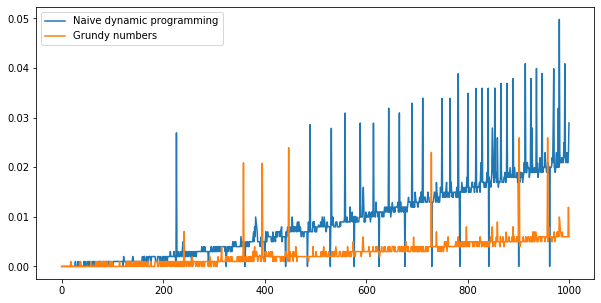

In [115]:
maxn = 1000
timedata = np.zeros((maxn,2))
for n in range(1,maxn):
    tic = time.time()
    s = Solution1()
    ans1 = s.winnerSquareGame(n)
    timedata[n,0] = time.time() - tic
    
    tic = time.time()
    ans2 = solution2(n)
    timedata[n,1] = time.time() - tic
    print('.' if ans1==ans2 else '!', end='')
    
plt.figure(figsize=(10,5));
plt.plot(timedata);
plt.legend(labels=['Naive dynamic programming', 'Grundy numbers']);

```
8
a4: b4 - lost
a1(7): b1(6): a4(2): b1(1): a1 - Alice won
a1(7): b4(3): a1(2): b1(1): a1 - Alice won
So for 8 Alice can win.
```